In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import matplotlib.pyplot as plt
import swan_vis as swan

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [2]:
ab = '../../lr_bulk/talon/human_talon_abundance.tsv'
filt_ab = '../../lr_bulk/cerberus/cerberus_filtered_abundance.tsv'
read_annot = '../../lr_bulk/talon/human_talon_read_annot.tsv'
t_metadata = '../../refs/cerberus/v40_transcript_metadata.tsv'
ver = 'v40_cerberus'
min_tpm = 1
gene_subset = 'polya'
obs_col = 'sample'
swan_file = '../../lr_bulk/cerberus/swan/swan_meta.p'
mouse_swan_file = '../../mouse/lr_bulk/swan/swan.p'

## Box plots for number of libraries, samples, and tissues / cell types

In [4]:
h_meta = swan.read(swan_file).adata.obs.copy(deep=True)
m_meta = swan.read(mouse_swan_file).adata.obs.copy(deep=True)

Read in graph from ../../lr_bulk/cerberus/swan/swan_meta.p
Read in graph from ../../mouse/lr_bulk/swan/swan.p


In [16]:
h_meta['species'] = 'Human'
m_meta['species'] = 'Mouse'
keep_cols = ['dataset', 'sample', 'classification', 'species']
df = pd.concat([h_meta, m_meta], axis=0)[keep_cols]
df.head()

,dataset,sample,classification,species
index,,,,
h9_neural_crest_1_1,h9_neural_crest_1_1,h9_neural_crest,cell_line,Human
a673_1_1,a673_1_1,a673,cell_line,Human
h9_chondro_1_3,h9_chondro_1_3,h9_chondro,cell_line,Human
hl60_m2_24hr_1_2,hl60_m2_24hr_1_2,hl60_m2_24hr,cell_line,Human
h9_neural_crest_1_2,h9_neural_crest_1_2,h9_neural_crest,cell_line,Human


In [17]:
# gb species and classification and count libraries
temp = df.groupby(['classification', 'species']).count().reset_index()
temp = temp[['classification', 'species', 'dataset']]
temp.rename({'dataset': 'n_libraries'}, axis=1, inplace=True)

# gb species and classification and count samples
temp2 = df.groupby(['classification', 'species']).nunique().reset_index()
temp2 = temp2[['classification', 'species', 'sample']]
temp2.rename({'sample': 'n_samples'}, axis=1, inplace=True)

temp = temp.merge(temp2, on=['species', 'classification'])


In [18]:
def make_summary_box_plot(temp, y, ylabel, ofile):
    sns.set_context('paper', font_scale=2)
    plt.figure(figsize=(3,4))
    mpl.rcParams['font.family'] = 'Arial'
    mpl.rcParams['pdf.fonttype'] = 42

    c_dict, order = get_tissue_cell_line_colors()    
    ax = sns.barplot(data=temp, x='species', y=y,
                hue='classification',
                palette=c_dict, saturation=1)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    xlabel = ''
    ylabel = ylabel

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    _ = ax.set(xlabel=xlabel, ylabel=ylabel)

    def add_perc_2(ax):
        ylim = ax.get_ylim()[1]
        n_cats = len(ax.patches)
        for p in ax.patches:
            label = '{:.0f}'.format(p.get_height())
            x = p.get_x() + p.get_width() / 2
            y = p.get_y() + p.get_height() + ylim*0.01
            ax.annotate(label, (x, y), size=16, horizontalalignment='center')


    add_perc_2(ax)
    plt.savefig(ofile, dpi=500, layout='tight', bbox_inches="tight")

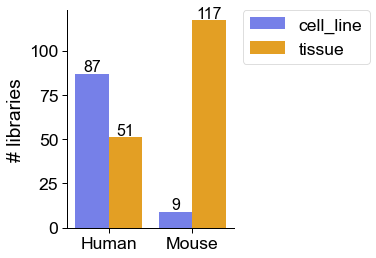

In [19]:
make_summary_box_plot(temp, 'n_libraries', '# libraries', 'figures/library_box_plot.pdf')

## Human sample color legend

Read in graph from ../../lr_bulk/cerberus/swan/swan_meta.p


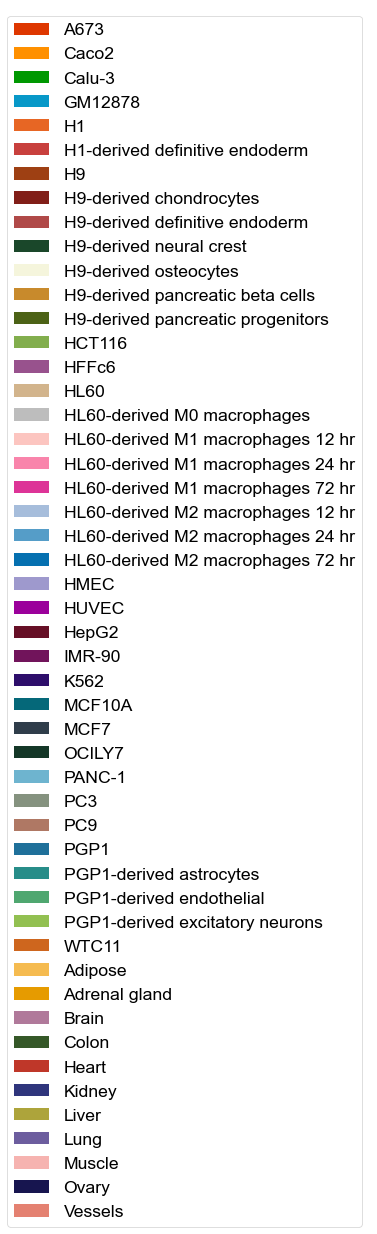

In [3]:
plot_human_sample_legend(swan_file,
                   'human_sample_color_legend.pdf')

## Mouse sample color legend

Read in graph from ../../mouse/lr_bulk/swan/swan.p


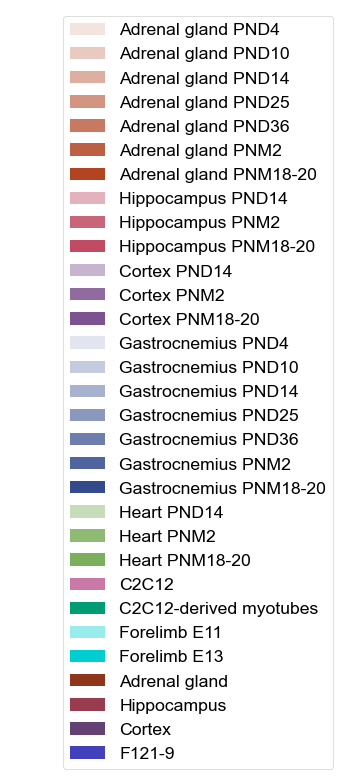

In [4]:
plot_mouse_sample_legend(mouse_swan_file,
                   'mouse_sample_color_legend.pdf')